<a href="https://colab.research.google.com/github/mjalalimanesh/statistical-learning-ISLR-python/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ISLR book**

https://github.com/mjalalimanesh/statistical-learning-ISLR-python

**Chapter 4 Lab : Logistic Regression, LDA, QDA, and KNN**

Import libraries

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 4.6.1 The Stock market data

In [2]:
# load data
smarket = pd.read_csv('https://raw.githubusercontent.com/mjalalimanesh/statistical-learning-ISLR-python/master/datasets/Smarket.csv', index_col=0)
smarket.Direction = smarket.Direction.astype('category')
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
smarket.shape

(1250, 9)

In [5]:
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


In [6]:
smarket.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Year       1250 non-null   int64   
 1   Lag1       1250 non-null   float64 
 2   Lag2       1250 non-null   float64 
 3   Lag3       1250 non-null   float64 
 4   Lag4       1250 non-null   float64 
 5   Lag5       1250 non-null   float64 
 6   Volume     1250 non-null   float64 
 7   Today      1250 non-null   float64 
 8   Direction  1250 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 89.3 KB


In [ ]:
sns.pairplot(smarket, hue='Direction');

In [8]:
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


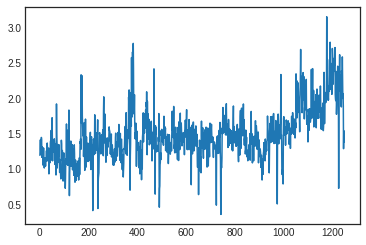

In [9]:
plt.plot(smarket.Volume);

## 4.6.2 Logistic Regression

### Using statsmodels

In [10]:
X_sm = smarket.loc[:,'Lag1':'Volume']
y_sm_1 = pd.get_dummies(smarket.Direction).iloc[:, 1] # dummy encoding
y_sm = preprocessing.LabelEncoder().fit_transform(smarket.Direction)
print((y_sm.dtype))
print((y_sm_1.dtype))
glm_fit_sm = sm.Logit(y_sm, sm.add_constant(X_sm)).fit()
print(glm_fit_sm.summary2())

int64
uint8
Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.002    
Dependent Variable: y                AIC:              1741.5841
Date:               2020-11-14 07:09 BIC:              1777.5004
No. Observations:   1250             Log-Likelihood:   -863.79  
Df Model:           6                LL-Null:          -865.59  
Df Residuals:       1243             LLR p-value:      0.73187  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     4.0000                                      
------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
------------------------------------------------------------------
const     -0.1260     0.2407   -0.5234   0.6007   -0.5978   0.3458
Lag1      -0.0731     0.0502   -1.4566   0.1452   -0.1714 

In [11]:
glm_fit_sm.params

const    -0.126000
Lag1     -0.073074
Lag2     -0.042301
Lag3      0.011085
Lag4      0.009359
Lag5      0.010313
Volume    0.135441
dtype: float64

In [12]:
glm_fit_sm.predict()[0:5]

array([0.50708413, 0.48146788, 0.48113883, 0.51522236, 0.51078116])

In [13]:
glm_fit_sm_pred = glm_fit_sm.predict() >= 0.5

In [14]:
glm_fit_sm.pred_table()

array([[145., 457.],
       [141., 507.]])

In [15]:
np.mean(glm_fit_sm_pred == y_sm)

0.5216

### Using scikit-learn

In [16]:
from sklearn.linear_model import LogisticRegression

X_sk = smarket.loc[:,'Lag1':'Volume']
y_sk = smarket.Direction

glm_model = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit = glm_model.fit(X_sk, y_sk)

In [17]:
glm_fit.intercept_, glm_fit.coef_

(array([-0.12600781]),
 array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
          0.13544567]]))

In [18]:
# prediction summary
pd.DataFrame({'prob_0': glm_fit.predict_proba(X_sk)[:, 0], 
              'prob_1': glm_fit.predict_proba(X_sk)[:, 1], 
              'pred_class': glm_fit.predict(X_sk)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.492916,0.507084,Up
1,0.518533,0.481467,Down
2,0.518861,0.481139,Down
3,0.484778,0.515222,Up
4,0.489219,0.510781,Up
...,...,...,...
1245,0.480107,0.519893,Up
1246,0.494075,0.505925,Up
1247,0.460732,0.539268,Up
1248,0.473882,0.526118,Up


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

# labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_sk, glm_fit.predict(X_sk)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,145,457
1,141,507


In [20]:
print('Train Accuracy: ' + str(accuracy_score(y_sk, glm_fit.predict(X_sk))))
print('Training Error: ' + str(1 - accuracy_score(y_sk, glm_fit.predict(X_sk))))

Train Accuracy: 0.5216
Training Error: 0.47840000000000005


In [21]:
# separate training and test sets
train = smarket.loc[smarket.Year < 2005]
smarket_2005 = smarket.loc[smarket.Year >= 2005]

In [22]:
X_sk_train = train.loc[:,'Lag1':'Volume']
y_sk_train = train.Direction

X_sk_test = smarket_2005.loc[:,'Lag1':'Volume']
y_sk_test = smarket_2005.Direction

glm_model_t = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t = glm_model.fit(X_sk_train, y_sk_train)

In [23]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test, glm_fit.predict(X_sk_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,77,34
1,97,44


In [24]:
print('Test Accuracy: ' + str(accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test, glm_fit.predict(X_sk_test))))

Test Accuracy: 0.4801587301587302
Test Error: 0.5198412698412698


In [25]:
X_sk_train_s = train.loc[:,'Lag1':'Lag2']
y_sk_train_s = train.Direction

X_sk_test_s = smarket_2005.loc[:,'Lag1':'Lag2']
y_sk_test_s = smarket_2005.Direction

glm_model_t_s = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
glm_fit_t_s = glm_model.fit(X_sk_train_s, y_sk_train_s)

In [26]:
conf_m = pd.DataFrame(confusion_matrix(y_sk_test_s, glm_fit.predict(X_sk_test_s)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,35,76
1,35,106


In [27]:
print('Test Accuracy: ' + str(accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))
print('Test Error: ' + str(1 - accuracy_score(y_sk_test_s, glm_fit.predict(X_sk_test_s))))

Test Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


In [28]:
# predictions for arbitrary data

predict_data = pd.DataFrame({'Lag1': [1.2, 1.5], 'Lag2': [1.1, -0.8]})

df = pd.DataFrame(glm_fit.predict_proba(predict_data))
df.columns = ['pred_0', 'pred_1']
df

,pred_0,pred_1
0,0.520854,0.479146
1,0.503889,0.496111


## 4.6.3 Linear Discriminant Analysis

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [30]:
df = pd.DataFrame(lda_fit.priors_.reshape((1,2))) # group priors
df.columns = ['Down', 'Up']
df

,Down,Up
0,0.491984,0.508016


In [31]:
df = pd.DataFrame(lda_fit.means_) # group means
df.columns = ['Lag1', 'Lag2']
df.index = ['Down', 'Up']
df

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [32]:
lda_fit.scalings_ # coefficients of ld

array([[-0.64201904],
       [-0.51352928]])

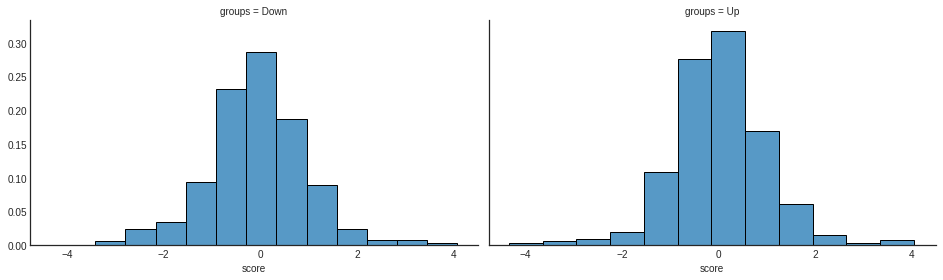

In [33]:
# for plotting lda, needs imporovement
linear_discriminants = X_train.iloc[:, 0] * lda_fit.scalings_[0] + X_train.iloc[:, 1] * lda_fit.scalings_[1]

ld = pd.DataFrame({'groups': y_train, 'score': linear_discriminants})

g = sns.FacetGrid(ld, col='groups',height=4, aspect=1.65)
g.map(sns.histplot, 'score', bins=12, stat="probability");

In [34]:
# prediction summary
linear_discriminants = X_test.iloc[:, 0] * lda_fit.scalings_[0] + X_test.iloc[:, 1] * lda_fit.scalings_[1]
df = pd.DataFrame({'prob_0': lda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': lda_fit.predict_proba(X_test)[:, 1],
              'linear_discriminants' : linear_discriminants ,
              'pred_class': lda_fit.predict(X_test),
              'true_class': y_test}, 
             columns=['prob_0', 'prob_1', 'linear_discriminants' ,'pred_class', 'true_class'])

df.reset_index(inplace=True)
df[20:30]

,index,prob_0,prob_1,linear_discriminants,pred_class,true_class
20,1019,0.500657,0.499343,-0.403468,Down,Up
21,1020,0.510874,0.489126,-0.876797,Down,Up
22,1021,0.503992,0.496008,-0.557984,Down,Down
23,1022,0.491634,0.508366,0.014537,Up,Up
24,1023,0.504177,0.495823,-0.566541,Down,Down
25,1024,0.502675,0.497325,-0.496956,Down,Up
26,1025,0.491404,0.508596,0.025158,Up,Down
27,1026,0.480596,0.519404,0.526203,Up,Up
28,1027,0.488272,0.511728,0.170318,Up,Up
29,1028,0.506219,0.493781,-0.661115,Down,Up


Text(0.5, 1.0, 'hue by true label')

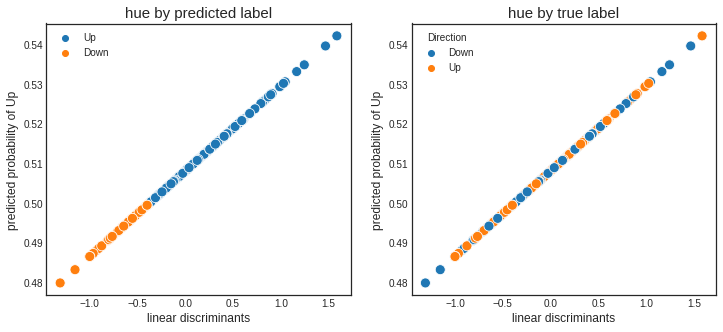

In [35]:
# not sure if correct!
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

y = lda_fit.predict_proba(X_test)[:, 1]
sns.scatterplot(x=linear_discriminants, y=y, hue = lda_fit.predict(X_test), s=100, ax=axs[0])
axs[0].set_xlabel('linear discriminants', fontsize=12)
axs[0].set_ylabel('predicted probability of Up', fontsize=12)
axs[0].set_title('hue by predicted label', fontsize=15)

sns.scatterplot(x=linear_discriminants, y=y, hue = y_test, s=100, ax=axs[1])
axs[1].set_xlabel('linear discriminants', fontsize=12)
axs[1].set_ylabel('predicted probability of Up', fontsize=12)
axs[1].set_title('hue by true label', fontsize=15)


In [36]:

conf_m = pd.DataFrame(confusion_matrix(y_test, glm_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
print('logistic regression confusion matrix\n')
print(conf_m)
conf_m = pd.DataFrame(confusion_matrix(y_test, lda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
print('\nLDA confusion matrix\n')
print(conf_m)


logistic regression confusion matrix

Predicted   0    1
True              
0          35   76
1          35  106

LDA confusion matrix

Predicted   0    1
True              
0          35   76
1          35  106


In [37]:
print('Test Accuracy: ' + str(accuracy_score(y_test, lda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, lda_fit.predict(X_test))))

Test Accuracy: 0.5595238095238095
Test Error: 0.44047619047619047


## 4.6.4 Quadratic Discriminant Analysis 

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

In [39]:
qda_fit.priors_ # group priors

array([0.49198397, 0.50801603])

In [40]:
qda_fit.means_ # group means

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [41]:
qda_fit.scalings_ # coefficients of ld

[array([1.56294495, 1.47927279]), array([1.53455065, 1.47272326])]

In [42]:
# prediction summary
pd.DataFrame({'prob_0': qda_fit.predict_proba(X_test)[:, 0], 
              'prob_1': qda_fit.predict_proba(X_test)[:, 1], 
              'pred_class': qda_fit.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.487324,0.512676,Up
1,0.475901,0.524099,Up
2,0.463691,0.536309,Up
3,0.473925,0.526075,Up
4,0.490343,0.509657,Up
...,...,...,...
247,0.497670,0.502330,Up
248,0.494787,0.505213,Up
249,0.475864,0.524136,Up
250,0.482695,0.517305,Up


In [43]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,30,81
1,20,121


In [44]:
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 0.5992063492063492
Test Error: 0.4007936507936508


## 4.6.5 K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

X_train = train.loc[:,'Lag1':'Lag2']
y_train = train.Direction

X_test = smarket_2005.loc[:,'Lag1':'Lag2']
y_test = smarket_2005.Direction

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_model.fit(X_train, y_train)

In [46]:
# prediction summary
pd.DataFrame({'true_class' : y_test,
              'pred_class': knn_fit.predict(X_test)}, 
             columns=['true_class', 'pred_class'])

,true_class,pred_class
999,Down,Up
1000,Down,Down
1001,Down,Up
1002,Up,Up
1003,Down,Up
...,...,...
1246,Up,Down
1247,Down,Down
1248,Up,Up
1249,Down,Down


In [47]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,43,68
1,58,83


In [48]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.5
Test Error: 0.5


In [49]:
knn_model_3 = KNeighborsClassifier(n_neighbors=3)
knn_fit_3 = knn_model_3.fit(X_train, y_train)

In [50]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit_3.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit_3.predict(X_test))))

Accuracy: 0.5317460317460317
Test Error: 0.46825396825396826


## 4.6.6 An Application to Caravan Insurance Data

In [ ]:
# load data
caravan = pd.read_csv('https://raw.githubusercontent.com/mjalalimanesh/statistical-learning-ISLR-python/master/datasets/Caravan.csv', index_col=0)
caravan.Purchase = caravan.Purchase.astype('category')
caravan.head()

In [ ]:
caravan.info(memory_usage='deep')

In [53]:
caravan.Purchase.value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [54]:
caravan.Purchase.value_counts()['Yes']/len(caravan)

0.05977327378907592

In [63]:
X = caravan.iloc[:, :-1]
y = caravan.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X)

In [66]:
X_train = X[1001:]
y_train = y[1001:]

X_test = X[:1000]
y_test = y[:1000]

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_fit = knn_model.fit(X_train, y_train)

In [67]:
conf_m = pd.DataFrame(confusion_matrix(y_test, knn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,873,68
1,50,9


In [68]:
print('Accuracy: ' + str(accuracy_score(y_test, knn_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, knn_fit.predict(X_test))))

Accuracy: 0.882
Test Error: 0.118


In [73]:
np.mean(y_test != 'No')

0.059

In [74]:
from sklearn.metrics import precision_score
print('Precision for \'Yes\': ' + str(precision_score(y_test, knn_fit.predict(X_test), pos_label='Yes')))

Precision for 'Yes': 0.11688311688311688


In [75]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_fit3 = knn_model.fit(X_train, y_train)

print('Precision for \'Yes\': ' + str(precision_score(y_test, knn_fit3.predict(X_test), pos_label='Yes')))

Precision for 'Yes': 0.2


In [76]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_fit5 = knn_model.fit(X_train, y_train)

print('Precision for \'Yes\': ' + str(precision_score(y_test, knn_fit5.predict(X_test), pos_label='Yes')))

Precision for 'Yes': 0.2857142857142857


In [79]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_fit5 = knn_model.fit(X_train, y_train)

print('Precision for \'Yes\': ' + str(precision_score(y_test, knn_fit5.predict(X_test), pos_label='Yes')))

Precision for 'Yes': 0.3333333333333333


In [89]:
glm_model = LogisticRegression(fit_intercept=True, C=1e9, max_iter=500) # Large C for no regularization
glm_fit = glm_model.fit(X_train, y_train)

In [90]:
glm_pred_50 = pd.Series(glm_fit.predict_proba(X_test)[:, 1] > 0.5).map({False: 'No', True: 'Yes'})

conf_m = pd.DataFrame(confusion_matrix(y_test, glm_pred_50))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,934,7
1,59,0


In [91]:
glm_pred_50 = pd.Series(glm_fit.predict_proba(X_test)[:, 1] > 0.25).map({False: 'No', True: 'Yes'})

conf_m = pd.DataFrame(confusion_matrix(y_test, glm_pred_50))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,918,23
1,48,11


In [92]:
print('Precision for \'Yes\': ' + str(precision_score(y_test, glm_pred_50, pos_label='Yes')))

Precision for 'Yes': 0.3235294117647059
